# Data exploration of CyTOF sets

In [48]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import f1_score
import os
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
import collections

## Sample of data

In [49]:
sample = pd.read_csv("../Data/HMIS-2/Samples/Samples01_CeD.csv", header=None)
markers = ['CCR6','CD19','C-KIT','CD11b','CD4','CD8a','CD7','CD25','CD123','TCRgd','CD45',
           'CRTH2','CD122','CCR7','CD14','CD11c','CD161','CD127','CD8b','CD27','IL-15Ra','CD45RA',
           'CD3','CD28','CD38','NKp46','PD-1','CD56']
sample.columns = markers
sample.head(10)

,CCR6,CD19,C-KIT,CD11b,CD4,CD8a,CD7,CD25,CD123,TCRgd,...,CD8b,CD27,IL-15Ra,CD45RA,CD3,CD28,CD38,NKp46,PD-1,CD56
0,0.00000,1.085600,0.00000,0.74139,0.00000,3.36620,4.44010,0.000000,0.000000,2.18260,...,0.0000,1.3079,0.00000,4.30830,0.875990,1.45540,5.1563,1.780700,0.00000,3.89030
1,0.00000,0.000000,0.01100,0.00000,4.10050,0.70986,3.43200,0.575670,0.006000,2.16630,...,0.0000,4.2390,0.00000,3.18660,4.679200,2.43820,2.1834,0.000000,0.00000,0.83889
2,0.00000,0.718080,0.00000,1.02720,4.46690,1.78540,4.58310,1.251000,0.000000,1.95560,...,1.0206,4.1595,0.87585,3.67660,4.843400,2.51750,5.1084,0.360730,0.00000,0.13717
3,2.62200,0.000000,0.00000,0.00000,0.50629,0.00000,0.00000,0.000000,0.086891,2.00060,...,1.5498,0.0000,0.00000,3.96750,0.470450,0.00000,2.5044,0.000000,0.00000,0.00000
4,1.55330,0.000000,0.00000,0.51423,0.00000,3.39030,5.61950,0.017399,0.000000,1.26040,...,1.3466,4.6891,0.54675,2.45160,0.055771,0.49921,4.9283,4.339900,0.00000,5.88430
5,0.00000,0.895450,0.52039,0.87272,4.63860,2.14740,2.46940,2.393000,0.000000,0.85497,...,0.0000,3.1459,0.49494,0.41278,3.770400,2.95100,0.0000,0.000000,2.51320,0.00000
6,0.49850,0.000000,0.00000,4.21490,2.40460,0.79798,0.00000,0.000000,0.060363,0.00000,...,0.0000,0.0000,0.00000,2.28000,0.000000,0.00000,4.7208,0.272800,0.00000,0.79212
7,0.79122,0.000000,0.00000,0.00000,4.57960,0.29069,4.08020,0.022798,0.000000,1.27990,...,1.4529,4.4697,2.49790,3.83380,4.024800,1.98380,2.9021,0.000000,0.00000,0.00000
8,0.00000,0.053175,0.21142,0.00000,4.64890,1.16870,4.19110,0.796630,1.099400,0.71934,...,1.2473,4.3725,2.71460,3.92080,5.332100,2.99210,3.1731,0.036992,0.50133,0.00000
9,2.09870,0.000000,0.00000,0.44279,0.00000,0.00000,0.14192,0.000000,1.062000,1.65130,...,0.0000,1.1142,0.00000,4.55620,2.621100,0.66133,1.7915,0.000000,0.00000,0.00000


In [50]:
#Declare variables for data acquisition from CSV results
labelfiles = os.listdir("../Data/HMIS-2/Labels/")
samplefiles = os.listdir("../Data/HMIS-2/Samples/")
labelfiles.sort()
samplefiles.sort()
F1list = []
Acclist = []
predictfiles = os.listdir("../Results/Predictions/HMIS-2 LDA/CV-sample")
predictfiles.sort()
truedict = collections.OrderedDict()
preddict = collections.OrderedDict()

In [51]:
#Data acquisition from CSV results

for i in range(len(samplefiles)):
    #Calculate F1 & accuracy scores for each prediciton
    true = list(pd.read_csv("../Data/HMIS-2/Labels/" + labelfiles[i], header=None, engine='python').values.ravel())
    predicted = list(pd.read_csv("../Results/Predictions/HMIS-2 LDA/CV-sample/" + predictfiles[i], header=None, engine='python').values.ravel())
    F1list.append(metrics.f1_score(y_true=true, y_pred=predicted, average=None, labels=list(set(true))))
    Acclist.append(metrics.accuracy_score(true, predicted))
    #Calculate counts of all original labels
    unique, counts = np.unique(true, return_counts=True)
    temp = dict(zip(unique, counts))
    for celltype in temp:
        try:
            truedict[celltype] += temp[celltype]
        except KeyError:
            truedict[celltype] = temp[celltype]
    #Calculate counts of all predicted labels
    unique, counts = np.unique(predicted, return_counts=True)
    temp = dict(zip(unique, counts))
    for celltype in temp:
        try:
            preddict[celltype] += temp[celltype]
        except KeyError:
            preddict[celltype] = temp[celltype]

/home/paul/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## CV-sample stats

In [52]:
instancecount =0
for key in preddict:
    instancecount += truedict[key]
print('Number of cell predictions made: %i' % instancecount)
instancecount =0
for key in preddict:
    instancecount += truedict[key]
print('Original number of true labels: %i' % instancecount)
preddict["Others 07"] = 0

Number of cell predictions made: 3550010
Original number of true labels: 3550010


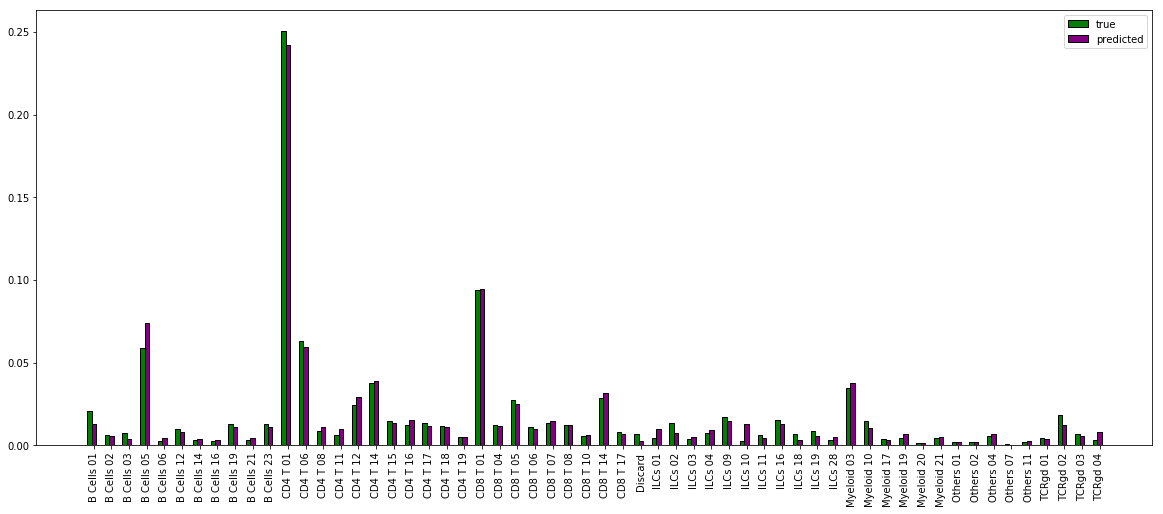

In [53]:
#increase plotsize
plt.rcParams['figure.figsize'] = [20, 8]
# set width of bars
barWidth = 0.25
# set height of bars
truedict = collections.OrderedDict(sorted(truedict.items()))
preddict = collections.OrderedDict(sorted(preddict.items()))

bars = [[dictionary[key] for key in dictionary] for dictionary in [truedict, preddict]]
for x in range(len(bars)):
    total = sum(bars[x])
    for y in range(len(bars[x])):
        bars[x][y] = bars[x][y] / total
#set bar x coords
r1 = np.arange(58)
r2 = r1 + 0.25
#plot bars & ticks
plt.bar(r1, bars[0], color='green', width=barWidth, edgecolor='black', label='true')
plt.bar(r2, bars[1], color='purple', width=barWidth, edgecolor='black', label='predicted')
plt.xticks([r + barWidth for r in range(len(bars[0]))], truedict.keys(), rotation='vertical' )
plt.legend()
plt.show()

In [54]:
truedict = collections.OrderedDict(sorted(truedict.items()))


In [55]:
F1median = np.median(F1list)
Accmean = np.mean(Acclist) * 100
Accstd = np.std(Acclist) * 100
print('HMIS-2 CV-samples')
print('Accuracy mean: %s' % round(Accmean, 2))
print('Accuracy std: %s' % round(Accstd, 2))
print('F1 median: %s' % round(F1median, 2))

ValueError: operands could not be broadcast together with shapes (46,) (53,) 

## CV-cells stats

In [ ]:
#Load all labels for 5-cold CV performance
predictlabels = pd.DataFrame()
truelabels = pd.DataFrame()

for batch in range(1, 6):
    predictlabels = predictlabels.append(pd.read_csv("../Results/Predictions/HMIS-2 LDA/CV-cells/" + 'predict_batch_' + str(batch) +'.csv',
                                          header=None, engine='python'))
for filename in labelfiles:
    truelabels = truelabels.append(pd.read_csv("../Data/HMIS-2/Labels/" + filename, header=None))



## Calculate accuracies and F1 scores for 5 fold

In [ ]:
F1list  = []
Acclist = []

kfoldsplitter = KFold(n_splits=5, shuffle=True, random_state=1)
for train, test in kfoldsplitter.split(predictlabels):
    true = truelabels.iloc[test].values.ravel()
    pred = predictlabels.iloc[test].values.ravel()
    F1list.append(metrics.f1_score(true, pred, average='weighted'))
    Acclist.append(metrics.accuracy_score(true, pred))

In [ ]:
F1median = np.median(F1list)
Accmean = np.mean(Acclist) * 100
Accstd = np.std(Acclist) * 100
print('HMIS-2 CV-cells')
print('Accuracy mean: %s' % round(Accmean, 2))
print('Accuracy std: %s' % round(Accstd, 2))
print('F1 median: %s' % round(F1median, 2))

In [ ]:

conmat = metrics.confusion_matrix(y_true=truelabels, y_pred=predictlabels)
conmat =  conmat / conmat.astype(np.float).sum(axis=0)


In [ ]:
plt.xticks([r + 1 for r in range(len(truedict.keys()))], truedict.keys(), rotation='vertical' )
plt.yticks([r + 1 for r in range(len(truedict.keys()))], truedict.keys(), rotation=0 )
cmap=plt.cm.Blues
plt.imshow(conmat, cmap=cmap)

cb = plt.pcolormesh(conmat, cmap=cmap)
cbar = plt.colorbar(cb)
cbar.set_label("Normalized confusion matrix values")
plt.draw()
plt.show()